In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('yashdata.csv',encoding='ISO-8859-1')

In [7]:
df['COUNTRY'].unique()
df['PRODUCTLINE'].unique()
df['DEALSIZE'].unique
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes
PRODUCTLINE = pd.get_dummies(df['PRODUCTLINE'])
DEALSIZE = pd.get_dummies(df['DEALSIZE'])
drop_cols=['PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE','ORDERDATE','STATUS','PRODUCTLINE']
df = df.drop(drop_cols,axis=1)

C:\Users\Yash Gokakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yash Gokakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yash Gokakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yash Gokakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

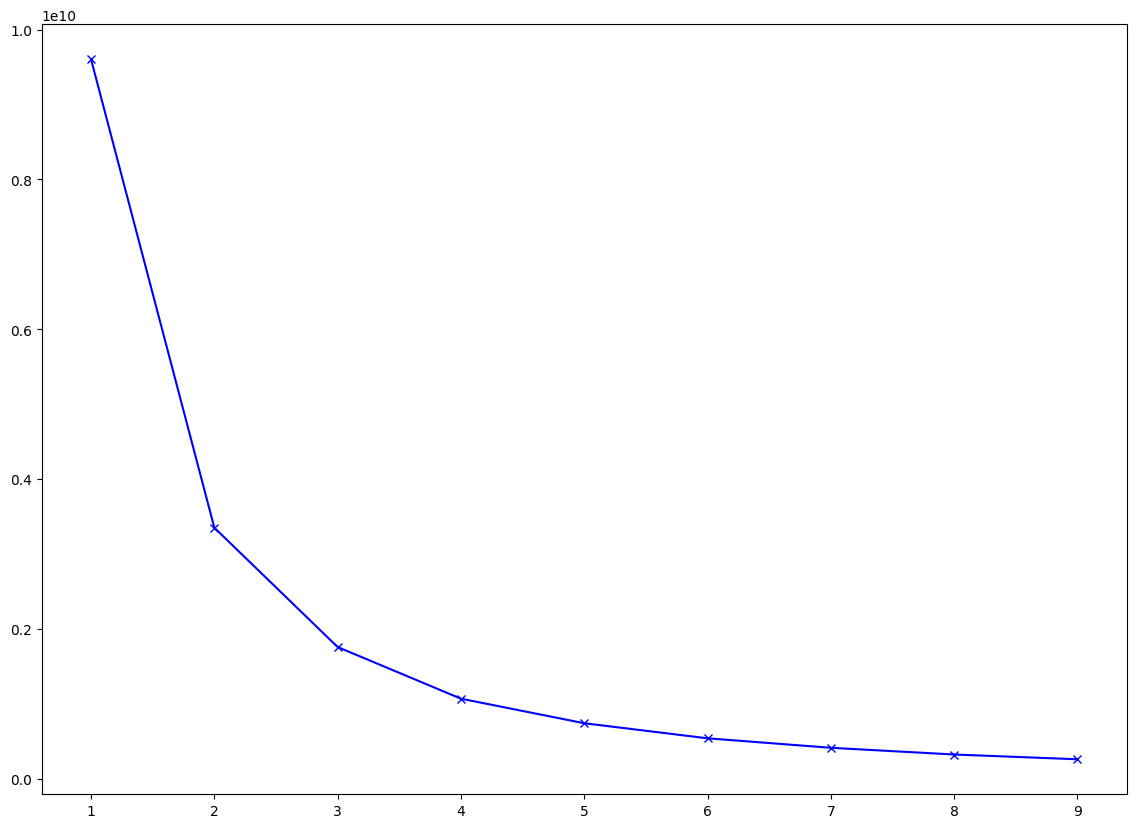

In [10]:
from sklearn.cluster import KMeans,k_means
distortions=[]
K=range(1,10)
for k in K:
    model1 = KMeans(n_clusters=k)
    model1.fit(df)
    distortions.append(model1.inertia_)
plt.figure(figsize=(14,10))
plt.plot(K,distortions,'bx-')

In [11]:
X_train=df.values
model = KMeans(n_clusters=3,random_state=2)
model = model.fit(X_train)
predict = model.predict(X_train)

C:\Users\Yash Gokakkar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_df = pd.DataFrame(pca.fit_transform(X_train),columns=['pca1','pca2'])

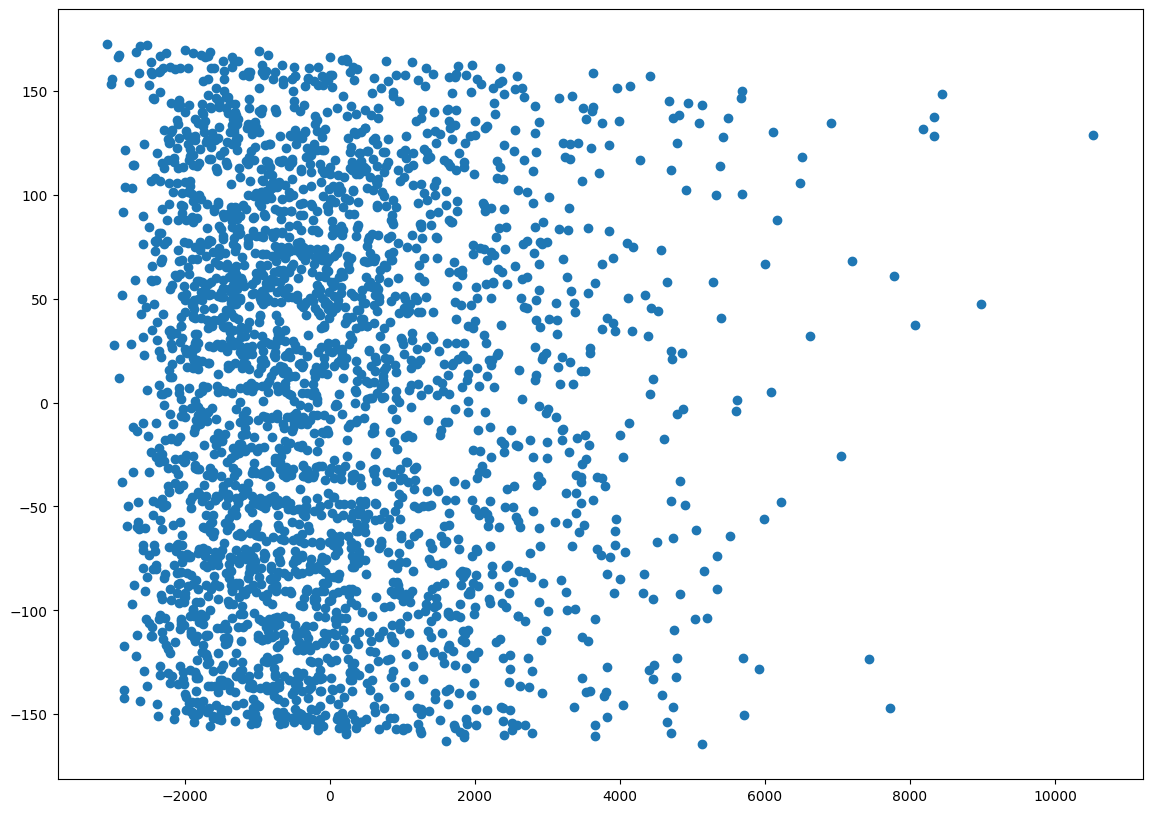

In [15]:
plt.figure(figsize=(14,10))
plt.scatter(X_df['pca1'],X_df['pca2'])

In [16]:
unique,counts = np.unique(predict,return_counts=True)
counts = counts.reshape(1,3)
counts_df = pd.DataFrame(counts,columns=['c1','c2','c3'])

In [18]:
centroids = pca.transform(model.cluster_centers_)
centroids

array([[ 5.75770445e+02, -4.15497289e+00],
       [-1.43520637e+03,  2.12038097e+00],
       [ 3.53451312e+03,  4.36504637e+00]])

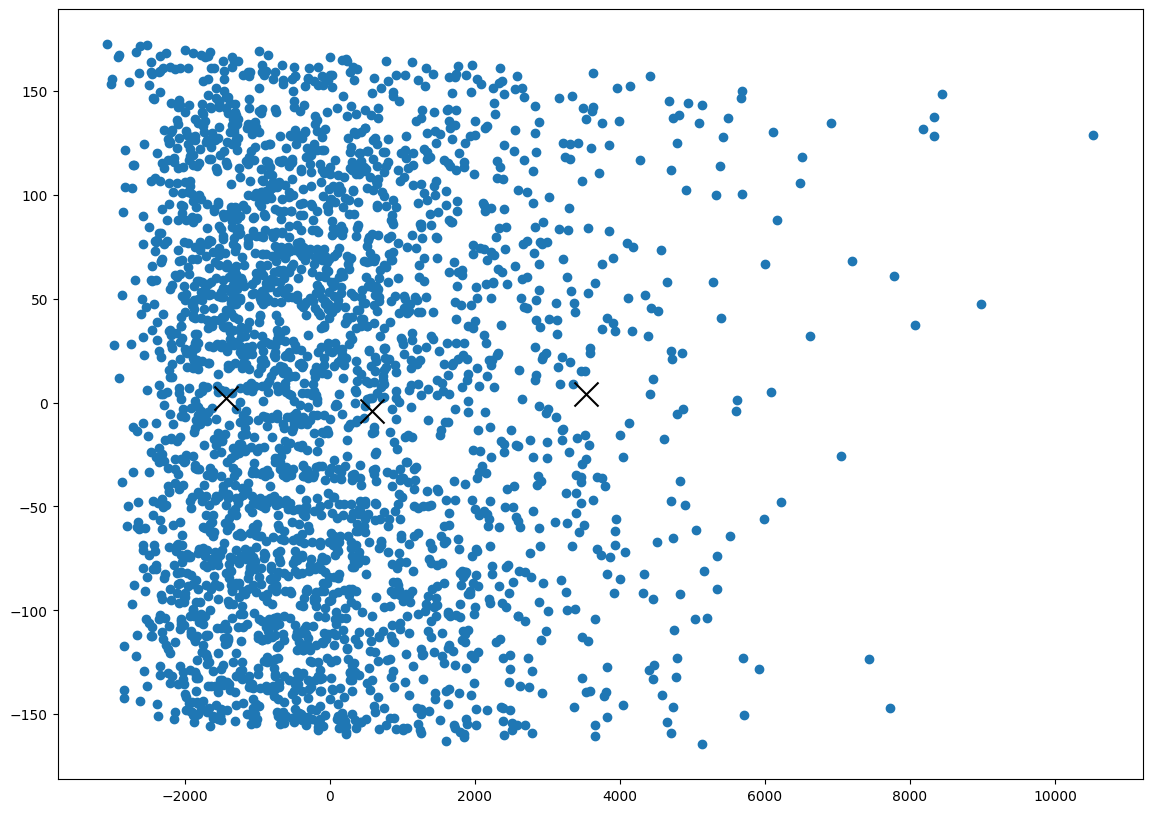

In [20]:
plt.figure(figsize=(14,10))
plt.scatter(X_df['pca1'],X_df['pca2'])
plt.scatter(centroids[:,0],centroids[:,1],color='black',marker='x',s=300)

In [21]:
X_df['Clusters']=predict

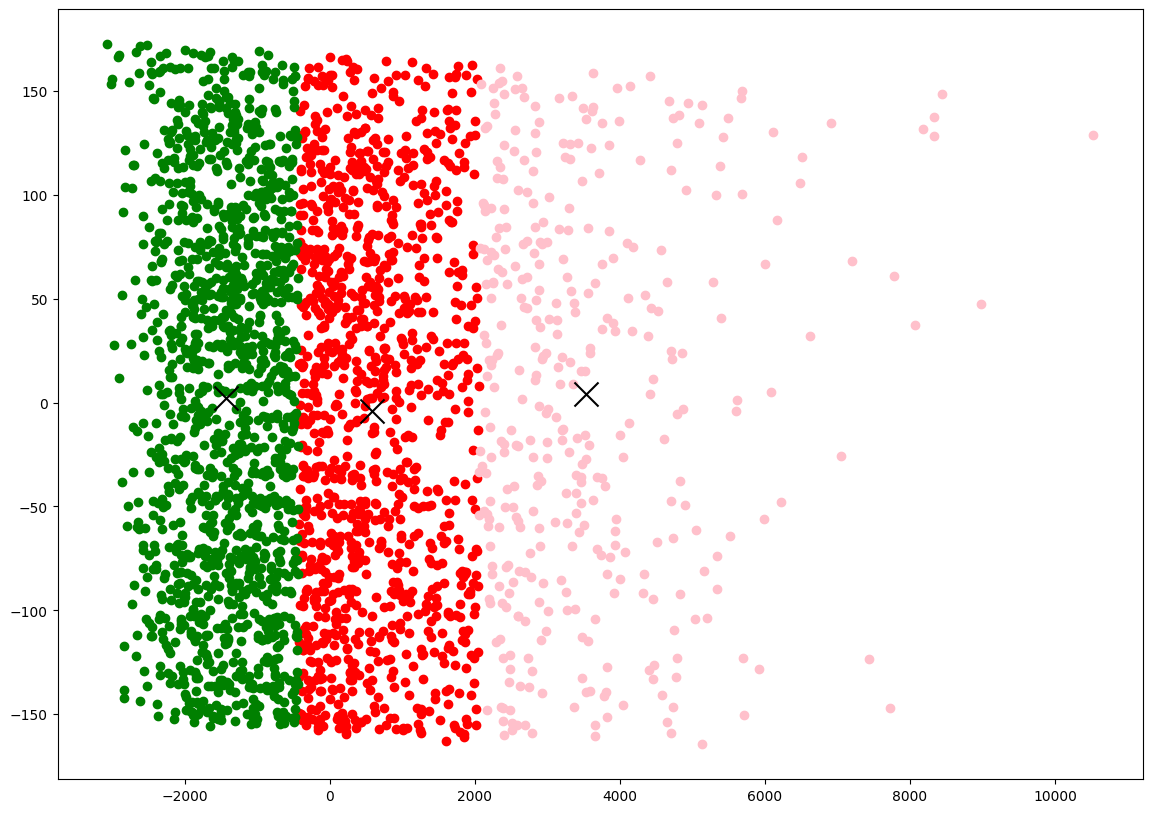

In [22]:
plt.figure(figsize=(14,10))
plt.scatter(X_df[X_df['Clusters']==0].loc[:,'pca1'],X_df[X_df['Clusters']==0].loc[:,'pca2'],color='red')
plt.scatter(X_df[X_df['Clusters']==1].loc[:,'pca1'],X_df[X_df['Clusters']==1].loc[:,'pca2'],color='green')
plt.scatter(X_df[X_df['Clusters']==2].loc[:,'pca1'],X_df[X_df['Clusters']==2].loc[:,'pca2'],color='pink')
plt.scatter(centroids[:,0],centroids[:,1],color='black',marker='x',s=300)